In [46]:
%load_ext autoreload

# Enable autoreload
%autoreload 2

import sys 
sys.path.append("..")
from src.dataset import Dataset
import pandas as pd
import numpy as np
from definitions import *
import copy



import matplotlib.pyplot as plt

import warnings

# Suppress LightGBM categorical_feature warning
warnings.filterwarnings("ignore", category=UserWarning, message="categorical_feature keyword has been found*")
warnings.filterwarnings("ignore", category=UserWarning, message="categorical_feature in param dict is overridden*")

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, balanced_accuracy_score
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
dataset_name = "adult"



dataset_name_latex = "\\"+dataset_name


if dataset_name=="credit":
    dataset_name_latex += "dataset"
dataset_generator = Dataset(dataset_name)
all_data = dataset_generator.original_dataframe.copy()




arrays = np.load('../results/{}/arrays/arrays_all_models_all_fairness_metrics_all_protected.npz'.format(dataset_name))

average = arrays['average']
std = arrays['std']

# average_over_problems = np.mean(average, axis=0)
# std_over_problems = np.std(average, axis=0)


Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.


In [48]:
column_types_map = [dataset_generator.dtype_map[col] for col in all_data.columns]

# Check if all columns have the data type 'category'
all_categorical = all(dtype == 'category' for dtype in column_types_map)

# generative_methods = ["tvae", "cart", "smote"]
protected_attributes_all = ["sex", "race", "sex & race"]
sampling_methods = ["class", "class & protected", "protected", "same (ratio)"]
generative_methods = ["SDV-GC", "CTGAN", "TVAE", "CART", "SMOTE-NC"]





In [49]:
average.shape

(3, 1, 21, 1, 6)

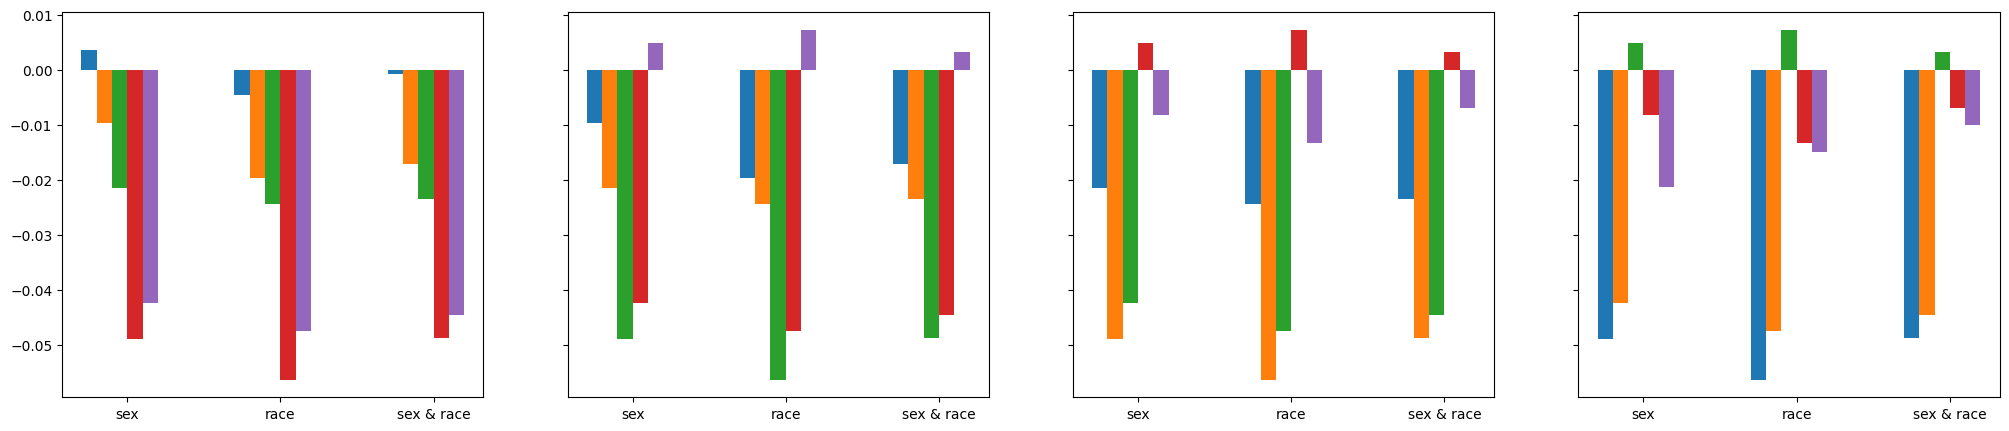

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=len(sampling_methods), figsize=(25, 5), sharey=True)

width = 0.1
tab10 = plt.get_cmap('tab10')

ind = np.arange(len(protected_attributes_all)) 

for s, sampling_method in enumerate(sampling_methods):

    real = average[:, 0, 0, 0]
    rest_for_sampling_method = average[:, 0, 1+s:1+s+len(generative_methods), 0]
    ax = axes[s]

    for g, generative_method in enumerate(generative_methods):

        method_res = rest_for_sampling_method[:,g,:]


        roc_auc = 1- method_res[:,2]/real[:,2]
        # eqodd = 1 - rest_for_sampling_method[:,0,3]/real[3]
        # sp = 1 - rest_for_sampling_method[:,0,4]/real[4]
        # eqopp = 1 - rest_for_sampling_method[:,0,5]/real[5]

        color = tab10(g % 10)
        ax.bar(ind + g*width, roc_auc, width, color = color)
        ax.set_xticks(ind+len(generative_methods)/2* width, protected_attributes_all) 





    # print(rest_for_sampling_method.shape)
    # ax = axes[p, s]

    # # for j, generative_method in enumerate(generative_methods):

    # roc_auc = 1- rest_for_sampling_method[:,0,2]/real[2]
    # eqodd = 1 - rest_for_sampling_method[:,0,3]/real[3]
    # sp = 1 - rest_for_sampling_method[:,0,4]/real[4]
    # eqopp = 1 - rest_for_sampling_method[:,0,5]/real[5]

    # ax.bar(ind, roc_auc, width, color = 'r') 
    # ax.bar(ind+width, eqodd, width, color = 'b') 
    # ax.bar(ind+2*width, sp, width, color = 'g') 
    # ax.bar(ind+3*width, eqopp, width, color = 'y') 

    # ax.set_xticks(ind+width, generative_methods) 


            
            


    # break

plt.show()


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (3).

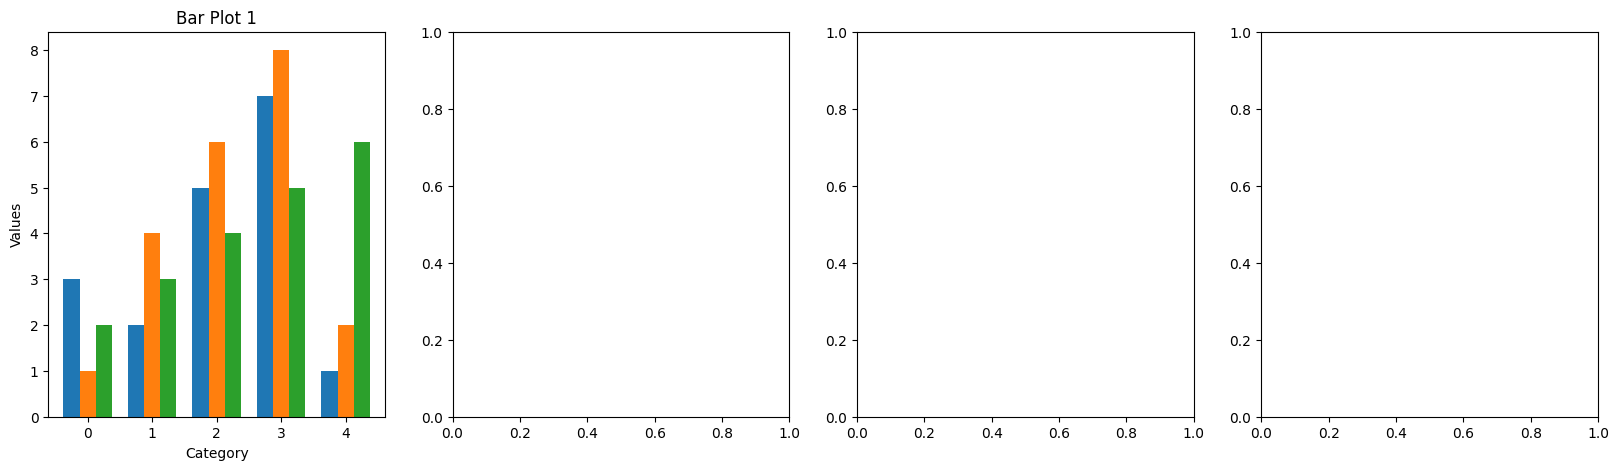

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data for the bar plots
data1 = [3, 2, 5, 7, 1]
data2 = [1, 4, 6, 8, 2]
data3 = [2, 3, 4, 5, 6]
data4 = [4, 5, 6, 7, 8]
data5 = [5, 6, 7, 8, 9]
labels = ['A', 'B', 'C']

# Function to plot three separate bar plots in each axis
def plot_bars(ax, data_sets, title):
    x = np.arange(len(data_sets[0]))  # the label locations
    width = 0.25  # the width of the bars

    for i, data in enumerate(data_sets):
        ax.bar(x + (i - 1) * width, data, width, label=f'Plot {labels[i]}')

    ax.set_xlabel('Category')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

# Create a figure
fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 4 columns
gs = GridSpec(1, 4, figure=fig)

# Create sub-axes based on GridSpec
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[0, 2])  # Third subplot
ax4 = fig.add_subplot(gs[0, 3])  # Fourth subplot

# Plot bar plots in each subplot
plot_bars(ax1, [data1, data2, data3], 'Bar Plot 1')
plot_bars(ax2, [data1, data4, data5], 'Bar Plot 2')
plot_bars(ax3, [data2, data3, data4], 'Bar Plot 3')
plot_bars(ax4, [data3, data4, data5], 'Bar Plot 4')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()
